In [36]:
import numpy as np
import os
import torch
from collections import Counter
from torch.utils.data import Dataset
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

In [37]:
path = "./aclImdb/"
path_train = os.path.join(path, "train")
path_test = os.path.join(path, "test")

In [38]:
def dataframe(data_path, data_size):
    data = []    
    target = []
    path_pos = os.path.join(data_path, "pos")
    path_neg = os.path.join(data_path, "neg")
    pos = os.listdir(os.path.join(data_path, "pos"))
    neg = os.listdir(os.path.join(data_path, "neg"))
    for i in range(data_size):
        with open(os.path.join(path_pos, pos[i]), "r") as f:
                text = f.read().replace("<br />", "")
                data.append(text)
                target.append(1)
        with open(os.path.join(path_neg, neg[i]), "r") as f:
                text = f.read().replace("<br />", "")
                data.append(text)
                target.append(0)
    return data, target

In [40]:
trainandvalid_set,  trainandvalid_target= dataframe(path_train, 12500)
test_data, test_targets = dataframe(path_test, 12500)

In [41]:
train_split = 20000
train_data = trainandvalid_set[:train_split]
train_targets = trainandvalid_target[:train_split]
val_data = trainandvalid_set[train_split:]
val_targets = trainandvalid_target[train_split:]

print ("Train dataset size is {}".format(len(train_data)))
print ("Val dataset size is {}".format(len(val_data)))
print ("Test dataset size is {}".format(len(test_data)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [5]:
import spacy
import string
# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
  tokens = tokenizer(sent)
  return [token.text.lower() for token in tokens if (token.text not in punctuations)]

# Example
tokens = tokenize(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple', 'is', 'looking', 'at', 'buying', 'u.k.', 'startup', 'for', '1', 'billion']


In [27]:
import pickle as pkl

def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
#print ("Tokenizing val data")
#val_data_tokens, _ = tokenize_dataset(val_data)
#pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [39]:
def tokenize_dataset_n(dataset, n):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:

        tokens = tokenize(sample)
        current =[]
        for i in range(len(tokens)-n+1):
            current_token = ''
            for j in range(i, i+n):
                current_token = current_token+tokens[j]+' '
            current_token = current_token[:-1]
            current.append(current_token)
            
        token_dataset.append(current)
        all_tokens += current 
        
    return token_dataset, all_tokens

In [41]:
# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset_n(val_data,2)
pkl.dump(val_data_tokens, open("val_data_tokens_2.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset_n(test_data,2)
pkl.dump(test_data_tokens, open("test_data_tokens_2.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset_n(train_data,2)
pkl.dump(train_data_tokens, open("train_data_tokens_2.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens_2.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [42]:
# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset_n(val_data,3)
pkl.dump(val_data_tokens, open("val_data_tokens_3.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset_n(test_data,3)
pkl.dump(test_data_tokens, open("test_data_tokens_3.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset_n(train_data,3)
pkl.dump(train_data_tokens, open("train_data_tokens_3.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens_3.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [43]:
# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset_n(val_data,4)
pkl.dump(val_data_tokens, open("val_data_tokens_4.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset_n(test_data,4)
pkl.dump(test_data_tokens, open("test_data_tokens_4.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset_n(train_data,4)
pkl.dump(train_data_tokens, open("train_data_tokens_4.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens_4.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [74]:
pkl.dump(train_targets, open("train_targets.p", "wb"))
pkl.dump(val_targets, open("val_targets.p", "wb"))
pkl.dump(test_targets, open("test_targets.p", "wb"))

In [147]:
import pickle as pkl
# Then, load preprocessed train, val and test datasets
train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 4758933


In [7]:
#2gram
train_data_tokens_2gram = pkl.load(open("train_data_tokens_2.p", "rb"))
all_train_tokens_2gram = pkl.load(open("all_train_tokens_2.p", "rb"))

val_data_tokens_2gram = pkl.load(open("val_data_tokens_2.p", "rb"))
test_data_tokens_2gram = pkl.load(open("test_data_tokens_2.p", "rb"))

#3gram
train_data_tokens_3gram = pkl.load(open("train_data_tokens_3.p", "rb"))
all_train_tokens_3gram = pkl.load(open("all_train_tokens_3.p", "rb"))

val_data_tokens_3gram = pkl.load(open("val_data_tokens_3.p", "rb"))
test_data_tokens_3gram = pkl.load(open("test_data_tokens_3.p", "rb"))

#4gram
train_data_tokens_4gram = pkl.load(open("train_data_tokens_4.p", "rb"))
all_train_tokens_4gram = pkl.load(open("all_train_tokens_4.p", "rb"))

val_data_tokens_4gram = pkl.load(open("val_data_tokens_4.p", "rb"))
test_data_tokens_4gram = pkl.load(open("test_data_tokens_4.p", "rb"))

In [115]:
# choose top 10000


max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens, max_vocab_size):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

#token2id_gram1_10k, id2token_gram1_10k = build_vocab(all_train_tokens,10000 )
#token2id_gram1_50k, id2token_gram1_50k = build_vocab(all_train_tokens,50000 )
#token2id_gram1_100k, id2token_gram1_100k = build_vocab(all_train_tokens,100000 )
#token2id_gram1_300k, id2token_gram1_300k = build_vocab(all_train_tokens,300000)

#token2id_gram2_10k, id2token_gram2_10k = build_vocab(all_train_tokens_2gram,10000 )
#token2id_gram2_50k, id2token_gram2_50k = build_vocab(all_train_tokens_2gram,50000 )
#token2id_gram2_100k, id2token_gram2_100k = build_vocab(all_train_tokens_2gram,100000 )
#token2id_gram2_300k, id2token_gram2_300k = build_vocab(all_train_tokens_2gram,300000)

##token2id_gram3_10k, id2token_gram3_10k = build_vocab(all_train_tokens_3gram,10000 )
#token2id_gram3_50k, id2token_gram3_50k = build_vocab(all_train_tokens_3gram,50000 )
#token2id_gram3_100k, id2token_gram3_100k = build_vocab(all_train_tokens_3gram,100000 )
#token2id_gram3_300k, id2token_gram3_300k = build_vocab(all_train_tokens_3gram,300000)

#token2id_gram4_10k, id2token_gram4_10k = build_vocab(all_train_tokens_4gram,10000 )
#token2id_gram4_50k, id2token_gram4_50k = build_vocab(all_train_tokens_4gram,50000 )
#token2id_gram4_100k, id2token_gram4_100k = build_vocab(all_train_tokens_4gram,100000 )
#token2id_gram4_300k, id2token_gram4_300k = build_vocab(all_train_tokens_4gram,300000)

In [106]:
# Lets check the dictionary by loading random token from it
import random
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))


Token id 591 ; token was in the
Token was in the; token id 591


In [146]:
# convert token to id in the dataset
def token2index_dataset(tokens_data, tokenID):
    indices_data = []
    for tokens in tokens_data:
        index_list = [tokenID[token] if token in tokenID else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices= token2index_dataset(train_data_tokens_2gram,token2id_gram2_10k)
val_data_indices = token2index_dataset(val_data_tokens_2gram,token2id_gram2_10k)
test_data_indices= token2index_dataset(test_data_tokens_2gram,token2id_gram2_10k)




# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [45]:
MAX_SENTENCE_LENGTH = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = NewsGroupDataset(train_data_indices, train_targets)
#val_loader = NewsGroupDataset(val_data_indices, val_targets)
#test_loader = NewsGroupDataset(test_data_indices, test_targets)

BATCH_SIZE = 32
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

#for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

In [46]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)


# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

In [38]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

After training for 10 epochs
Val Acc 83.46
Test Acc 80.296


In [120]:
def linear_annealing(epoch, learning_rate, optimizer):
    lr = learning_rate * (0.1 ** (epoch // 10))
    for param in optimizer.param_groups:
        param['lr'] = lr
        
def  bag_of_ngram (ans , train_tokens, val_tokens, test_tokens, all_tokens, vocab_size, emb_dim, learning_rate, lr_flag, num_epochs, method, MAX_SENTENCE_LENGTH = 200):
    
    PAD_IDX = 0
    UNK_IDX = 1
    token2id, id2token = build_vocab(all_tokens, vocab_size )
    train_data_indices = token2index_dataset(train_tokens,token2id)
    val_data_indices = token2index_dataset(val_tokens,token2id)
    test_data_indices = token2index_dataset(test_tokens,token2id)
    BATCH_SIZE = 32
    train_dataset = NewsGroupDataset(train_data_indices, train_targets)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    val_dataset = NewsGroupDataset(val_data_indices, val_targets)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_data_indices, test_targets)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False) 
    
    model = BagOfWords(len(id2token), emb_dim)
    # Criterion and Optimizer
    if method == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = torch.nn.CrossEntropyLoss()
    ans = []
    for epoch in range(num_epochs):
        if lr_flag == 1:
            linear_annealing(epoch, learning_rate, optimizer)
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                ans.append(val_acc)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    print ("After training for {} epochs".format(num_epochs))
    print ("Val Acc {}".format(test_model(val_loader, model)))
    print ("Test Acc {}".format(test_model(test_loader, model)))
    model.zero_grad()
    del(model)



# Compare SGD and Adam

In [66]:
SGD_result = []
bag_of_ngram (SGD_result,train_data_tokens, val_data_tokens,  test_data_tokens, all_train_tokens, vocab_size= 10000, 
                           emb_dim =100 ,learning_rate = 0.01, lr_flag = 0,  num_epochs =5, method = 'SGD')

Adam_result =[]
bag_of_ngram (Adam_result ,train_data_tokens, val_data_tokens, test_data_tokens, all_train_tokens, vocab_size = 10000, 
                            emb_dim = 100,learning_rate = 0.01, lr_flag = 0, num_epochs = 5, method ='Adam')

        

Epoch: [1/5], Step: [101/625], Validation Acc: 50.04
Epoch: [1/5], Step: [201/625], Validation Acc: 51.26
Epoch: [1/5], Step: [301/625], Validation Acc: 53.02
Epoch: [1/5], Step: [401/625], Validation Acc: 53.66
Epoch: [1/5], Step: [501/625], Validation Acc: 54.42
Epoch: [1/5], Step: [601/625], Validation Acc: 54.98
Epoch: [2/5], Step: [101/625], Validation Acc: 56.62
Epoch: [2/5], Step: [201/625], Validation Acc: 56.96
Epoch: [2/5], Step: [301/625], Validation Acc: 58.42
Epoch: [2/5], Step: [401/625], Validation Acc: 57.96
Epoch: [2/5], Step: [501/625], Validation Acc: 59.78
Epoch: [2/5], Step: [601/625], Validation Acc: 59.94
Epoch: [3/5], Step: [101/625], Validation Acc: 60.46
Epoch: [3/5], Step: [201/625], Validation Acc: 59.26
Epoch: [3/5], Step: [301/625], Validation Acc: 61.06
Epoch: [3/5], Step: [401/625], Validation Acc: 60.78
Epoch: [3/5], Step: [501/625], Validation Acc: 61.62
Epoch: [3/5], Step: [601/625], Validation Acc: 61.66
Epoch: [4/5], Step: [101/625], Validation Acc:

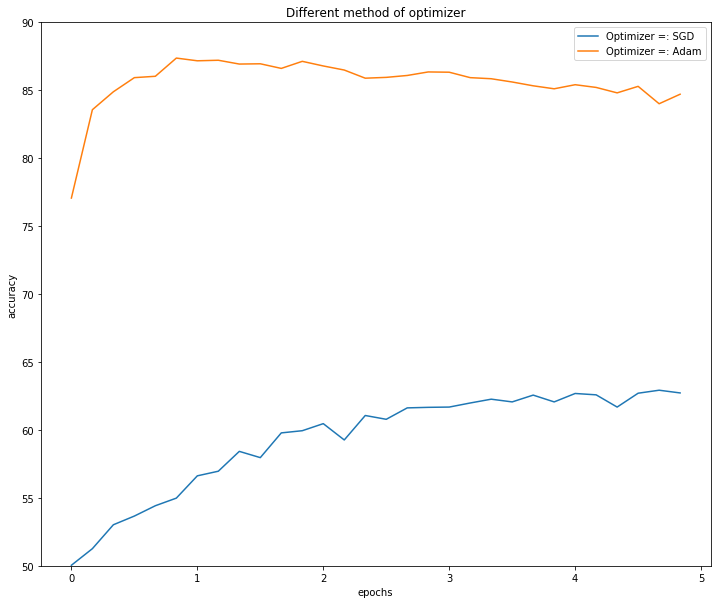

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
xpts = np.arange(0 , 5, 1/6)
fig,ax2=plt.subplots(figsize=(12,10))
lines=locals()

y = SGD_result
label = "Optimizer =: SGD"
plt.plot(xpts, y, label=label)
y = Adam_result
label = "Optimizer =: Adam"
plt.plot(xpts, y, label=label)

ax2.legend(loc = 'best')
plt.title('Different method of optimizer')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(50,90)
plt.show()

# Bag of Words & N-grams

In [72]:
pkl.dump(SGD_result, open("SGD_result.p", "wb"))
pkl.dump(Adam_result, open("Adam_result.p", "wb"))

In [121]:
Adam_result_2gram =[]
bag_of_ngram (Adam_result_2gram ,train_data_tokens_2gram, val_data_tokens_2gram, test_data_tokens_2gram, all_train_tokens_2gram, vocab_size = 10000, 
                            emb_dim = 100,learning_rate = 0.01, lr_flag = 0, num_epochs = 5, method ='Adam')

 

Epoch: [1/5], Step: [101/625], Validation Acc: 70.94
Epoch: [1/5], Step: [201/625], Validation Acc: 77.92
Epoch: [1/5], Step: [301/625], Validation Acc: 81.88
Epoch: [1/5], Step: [401/625], Validation Acc: 75.66
Epoch: [1/5], Step: [501/625], Validation Acc: 82.4
Epoch: [1/5], Step: [601/625], Validation Acc: 83.96
Epoch: [2/5], Step: [101/625], Validation Acc: 83.06
Epoch: [2/5], Step: [201/625], Validation Acc: 81.46
Epoch: [2/5], Step: [301/625], Validation Acc: 83.38
Epoch: [2/5], Step: [401/625], Validation Acc: 83.06
Epoch: [2/5], Step: [501/625], Validation Acc: 82.96
Epoch: [2/5], Step: [601/625], Validation Acc: 82.82
Epoch: [3/5], Step: [101/625], Validation Acc: 82.86
Epoch: [3/5], Step: [201/625], Validation Acc: 83.02
Epoch: [3/5], Step: [301/625], Validation Acc: 82.7
Epoch: [3/5], Step: [401/625], Validation Acc: 82.2
Epoch: [3/5], Step: [501/625], Validation Acc: 82.86
Epoch: [3/5], Step: [601/625], Validation Acc: 81.98
Epoch: [4/5], Step: [101/625], Validation Acc: 81

In [108]:
#SGD_result_3gram = []
#bag_of_ngram (SGD_result_3gram,train_data_tokens_3gram, val_data_tokens_3gram,  test_data_tokens_3gram, all_train_tokens_3gram, vocab_size= 10000, 
             #              emb_dim =100 ,learning_rate = 0.01, lr_flag = 0,  num_epochs =5, method = 'SGD')

Adam_result_3gram =[]
bag_of_ngram (Adam_result_3gram ,train_data_tokens_3gram, val_data_tokens_3gram, test_data_tokens_3gram, all_train_tokens_3gram, vocab_size = 10000, 
                            emb_dim = 100,learning_rate = 0.01, lr_flag = 0, num_epochs = 5, method ='Adam')

 

Epoch: [1/5], Step: [101/625], Validation Acc: 52.74
Epoch: [1/5], Step: [201/625], Validation Acc: 58.62
Epoch: [1/5], Step: [301/625], Validation Acc: 75.26
Epoch: [1/5], Step: [401/625], Validation Acc: 76.64
Epoch: [1/5], Step: [501/625], Validation Acc: 76.1
Epoch: [1/5], Step: [601/625], Validation Acc: 77.88
Epoch: [2/5], Step: [101/625], Validation Acc: 75.24
Epoch: [2/5], Step: [201/625], Validation Acc: 76.62
Epoch: [2/5], Step: [301/625], Validation Acc: 78.0
Epoch: [2/5], Step: [401/625], Validation Acc: 78.36
Epoch: [2/5], Step: [501/625], Validation Acc: 78.06
Epoch: [2/5], Step: [601/625], Validation Acc: 78.5
Epoch: [3/5], Step: [101/625], Validation Acc: 77.24
Epoch: [3/5], Step: [201/625], Validation Acc: 77.08
Epoch: [3/5], Step: [301/625], Validation Acc: 75.9
Epoch: [3/5], Step: [401/625], Validation Acc: 78.32
Epoch: [3/5], Step: [501/625], Validation Acc: 78.04
Epoch: [3/5], Step: [601/625], Validation Acc: 76.3
Epoch: [4/5], Step: [101/625], Validation Acc: 77.6

In [111]:

Adam_result_4gram =[]
bag_of_ngram (Adam_result_4gram ,train_data_tokens_4gram, val_data_tokens_4gram, test_data_tokens_4gram, all_train_tokens_4gram, vocab_size = 10000, 
                            emb_dim = 100,learning_rate = 0.01, lr_flag = 0, num_epochs = 5, method ='Adam')

 

Epoch: [1/5], Step: [101/625], Validation Acc: 50.02
Epoch: [1/5], Step: [201/625], Validation Acc: 52.0
Epoch: [1/5], Step: [301/625], Validation Acc: 52.68
Epoch: [1/5], Step: [401/625], Validation Acc: 56.7
Epoch: [1/5], Step: [501/625], Validation Acc: 69.84
Epoch: [1/5], Step: [601/625], Validation Acc: 59.46
Epoch: [2/5], Step: [101/625], Validation Acc: 68.9
Epoch: [2/5], Step: [201/625], Validation Acc: 72.02
Epoch: [2/5], Step: [301/625], Validation Acc: 67.58
Epoch: [2/5], Step: [401/625], Validation Acc: 71.0
Epoch: [2/5], Step: [501/625], Validation Acc: 72.6
Epoch: [2/5], Step: [601/625], Validation Acc: 70.64
Epoch: [3/5], Step: [101/625], Validation Acc: 72.62
Epoch: [3/5], Step: [201/625], Validation Acc: 72.54
Epoch: [3/5], Step: [301/625], Validation Acc: 71.72
Epoch: [3/5], Step: [401/625], Validation Acc: 68.86
Epoch: [3/5], Step: [501/625], Validation Acc: 70.64
Epoch: [3/5], Step: [601/625], Validation Acc: 72.48
Epoch: [4/5], Step: [101/625], Validation Acc: 72.3

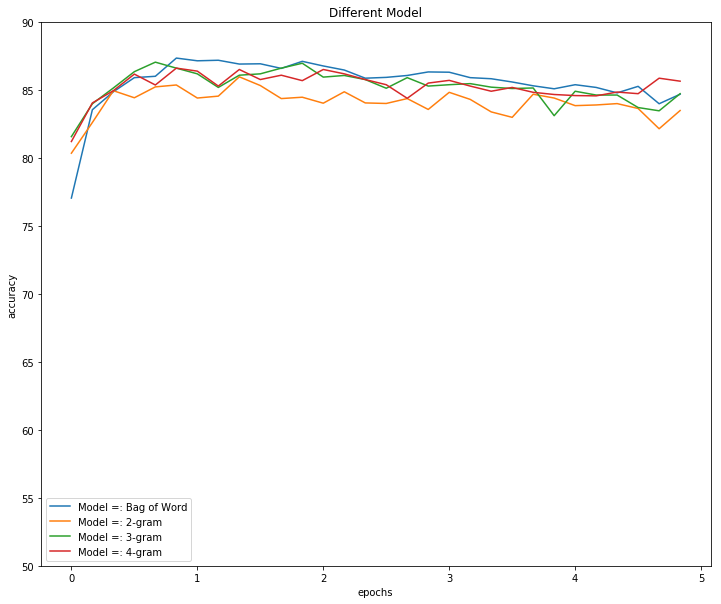

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
xpts = np.arange(0 , 5, 1/6)
fig,ax2=plt.subplots(figsize=(12,10))
lines=locals()

y = Adam_result
label = "Model =: Bag of Word"
plt.plot(xpts, y, label=label)
y = Adam_result_2gram
label = "Model =: 2-gram"
plt.plot(xpts, y, label=label)
y = Adam_result_3gram
label = "Model =: 3-gram"
plt.plot(xpts, y, label=label)
y = Adam_result_4gram
label = "Model =: 4-gram"
plt.plot(xpts, y, label=label)

ax2.legend(loc = 'best')
plt.title('Different Model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(50,90)
plt.show()

# Dimension of emb

In [149]:
dim_result=[]
for i in [100, 300, 500]:
    record =[]
    bag_of_ngram (record ,train_data_tokens, val_data_tokens, test_data_tokens, all_train_tokens, vocab_size = 10000, 
                            emb_dim=i,learning_rate = 0.01, lr_flag = 0, num_epochs = 5, method ='Adam')
    dim_result.append(record)


Epoch: [1/5], Step: [101/625], Validation Acc: 77.28
Epoch: [1/5], Step: [201/625], Validation Acc: 80.9
Epoch: [1/5], Step: [301/625], Validation Acc: 84.22
Epoch: [1/5], Step: [401/625], Validation Acc: 85.42
Epoch: [1/5], Step: [501/625], Validation Acc: 86.72
Epoch: [1/5], Step: [601/625], Validation Acc: 86.54
Epoch: [2/5], Step: [101/625], Validation Acc: 87.48
Epoch: [2/5], Step: [201/625], Validation Acc: 86.9
Epoch: [2/5], Step: [301/625], Validation Acc: 87.0
Epoch: [2/5], Step: [401/625], Validation Acc: 86.7
Epoch: [2/5], Step: [501/625], Validation Acc: 87.06
Epoch: [2/5], Step: [601/625], Validation Acc: 87.1
Epoch: [3/5], Step: [101/625], Validation Acc: 87.02
Epoch: [3/5], Step: [201/625], Validation Acc: 86.6
Epoch: [3/5], Step: [301/625], Validation Acc: 86.46
Epoch: [3/5], Step: [401/625], Validation Acc: 86.22
Epoch: [3/5], Step: [501/625], Validation Acc: 86.64
Epoch: [3/5], Step: [601/625], Validation Acc: 85.7
Epoch: [4/5], Step: [101/625], Validation Acc: 85.88


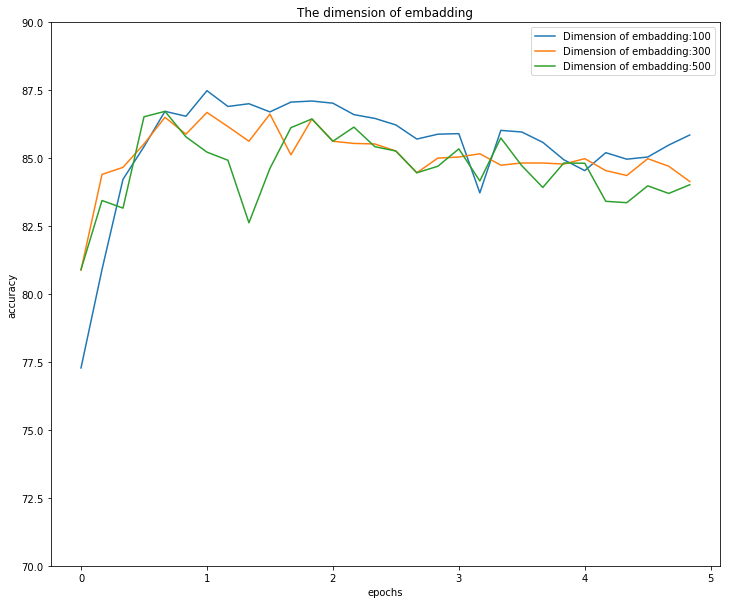

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline
xpts = np.arange(0 , 5, 1/6)
fig,ax2=plt.subplots(figsize=(12,10))
lines=locals()

i = 0
for step in ['100','300','500']:
    y = dim_result[i]
    label = "Dimension of embadding:"+str(step)
    plt.plot(xpts, y, label=label)
    i += 1

ax2.legend(loc = 'best')
plt.title('The dimension of embadding')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(70,90)
plt.show()

In [151]:
pkl.dump(dim_result, open("dim_result.p", "wb"))

# Vocab_size

In [152]:
size_result=[]
for i in [10000, 50000, 100000]:
    record =[]
    bag_of_ngram (record ,train_data_tokens, val_data_tokens, test_data_tokens, all_train_tokens, vocab_size = i, 
                            emb_dim=300,learning_rate = 0.01, lr_flag = 0, num_epochs = 5, method ='Adam')
    size_result.append(record)
    
pkl.dump(size_result, open("size_result.p", "wb")) 

Epoch: [1/5], Step: [101/625], Validation Acc: 81.04
Epoch: [1/5], Step: [201/625], Validation Acc: 82.86
Epoch: [1/5], Step: [301/625], Validation Acc: 85.5
Epoch: [1/5], Step: [401/625], Validation Acc: 86.46
Epoch: [1/5], Step: [501/625], Validation Acc: 86.74
Epoch: [1/5], Step: [601/625], Validation Acc: 87.0
Epoch: [2/5], Step: [101/625], Validation Acc: 87.08
Epoch: [2/5], Step: [201/625], Validation Acc: 87.14
Epoch: [2/5], Step: [301/625], Validation Acc: 86.56
Epoch: [2/5], Step: [401/625], Validation Acc: 86.52
Epoch: [2/5], Step: [501/625], Validation Acc: 86.58
Epoch: [2/5], Step: [601/625], Validation Acc: 86.02
Epoch: [3/5], Step: [101/625], Validation Acc: 86.62
Epoch: [3/5], Step: [201/625], Validation Acc: 85.92
Epoch: [3/5], Step: [301/625], Validation Acc: 82.76
Epoch: [3/5], Step: [401/625], Validation Acc: 85.22
Epoch: [3/5], Step: [501/625], Validation Acc: 85.7
Epoch: [3/5], Step: [601/625], Validation Acc: 84.7
Epoch: [4/5], Step: [101/625], Validation Acc: 84.

In [229]:
size_result.append(a)
size_result.append(b)
size_result.append(c)

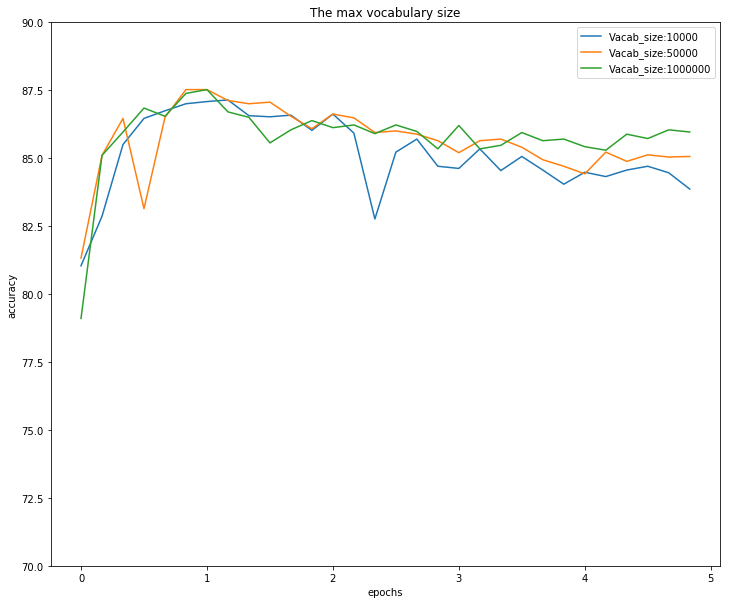

In [240]:
import matplotlib.pyplot as plt
%matplotlib inline
xpts = np.arange(0 , 5, 1/6)
fig,ax2=plt.subplots(figsize=(12,10))
lines=locals()

i = 0
for step in ['10000','50000','1000000']:
    y = size_result[i]
    label = "Vacab_size:"+str(step)
    plt.plot(xpts, y, label=label)
    i += 1

ax2.legend(loc = 'best')
plt.title('The max vocabulary size')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(70,90)
plt.show()

# Learning Rate & linear_annealing

In [153]:
lr_result=[]
for i in [0,1]:
    for j in [0.01, 0.05, 0.1]:
        record =[]
        bag_of_ngram (record ,train_data_tokens, val_data_tokens, test_data_tokens, all_train_tokens, vocab_size = 10000, 
                                emb_dim=300,learning_rate = j, lr_flag = i, num_epochs = 5, method ='Adam')
        lr_result.append(record)
        
pkl.dump(lr_result, open("lr_result.p", "wb"))     

Epoch: [1/5], Step: [101/625], Validation Acc: 81.58
Epoch: [1/5], Step: [201/625], Validation Acc: 76.0
Epoch: [1/5], Step: [301/625], Validation Acc: 85.16
Epoch: [1/5], Step: [401/625], Validation Acc: 86.36
Epoch: [1/5], Step: [501/625], Validation Acc: 87.06
Epoch: [1/5], Step: [601/625], Validation Acc: 86.62
Epoch: [2/5], Step: [101/625], Validation Acc: 86.2
Epoch: [2/5], Step: [201/625], Validation Acc: 85.2
Epoch: [2/5], Step: [301/625], Validation Acc: 86.1
Epoch: [2/5], Step: [401/625], Validation Acc: 86.2
Epoch: [2/5], Step: [501/625], Validation Acc: 86.62
Epoch: [2/5], Step: [601/625], Validation Acc: 86.98
Epoch: [3/5], Step: [101/625], Validation Acc: 85.96
Epoch: [3/5], Step: [201/625], Validation Acc: 86.08
Epoch: [3/5], Step: [301/625], Validation Acc: 85.78
Epoch: [3/5], Step: [401/625], Validation Acc: 85.14
Epoch: [3/5], Step: [501/625], Validation Acc: 85.92
Epoch: [3/5], Step: [601/625], Validation Acc: 85.3
Epoch: [4/5], Step: [101/625], Validation Acc: 85.4


Test Acc 81.036
Epoch: [1/5], Step: [101/625], Validation Acc: 72.36
Epoch: [1/5], Step: [201/625], Validation Acc: 75.32
Epoch: [1/5], Step: [301/625], Validation Acc: 75.18
Epoch: [1/5], Step: [401/625], Validation Acc: 81.8
Epoch: [1/5], Step: [501/625], Validation Acc: 84.22
Epoch: [1/5], Step: [601/625], Validation Acc: 83.18
Epoch: [2/5], Step: [101/625], Validation Acc: 83.52
Epoch: [2/5], Step: [201/625], Validation Acc: 80.84
Epoch: [2/5], Step: [301/625], Validation Acc: 83.28
Epoch: [2/5], Step: [401/625], Validation Acc: 83.94
Epoch: [2/5], Step: [501/625], Validation Acc: 84.0
Epoch: [2/5], Step: [601/625], Validation Acc: 83.36
Epoch: [3/5], Step: [101/625], Validation Acc: 83.04
Epoch: [3/5], Step: [201/625], Validation Acc: 79.3
Epoch: [3/5], Step: [301/625], Validation Acc: 77.04
Epoch: [3/5], Step: [401/625], Validation Acc: 79.58
Epoch: [3/5], Step: [501/625], Validation Acc: 83.42
Epoch: [3/5], Step: [601/625], Validation Acc: 84.9
Epoch: [4/5], Step: [101/625], Val

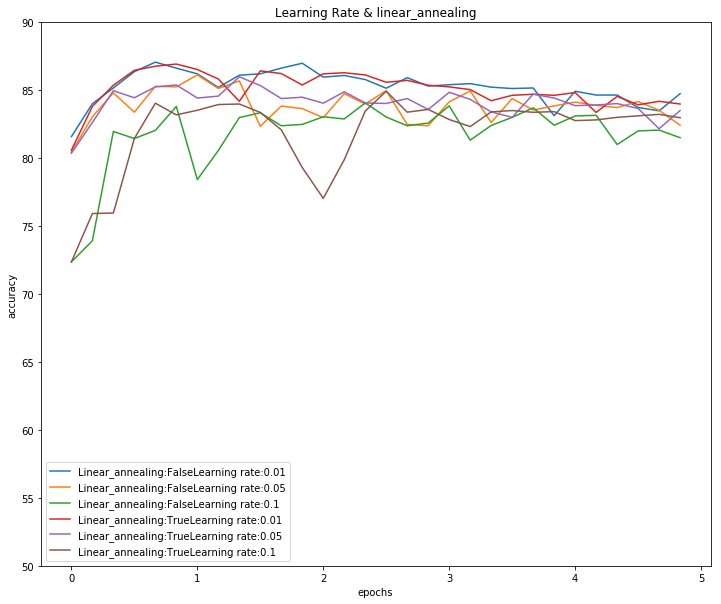

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
xpts = np.arange(0 , 5, 1/6)
fig,ax2=plt.subplots(figsize=(12,10))
lines=locals()

i = 0
for step in ['False', 'True']:
    for mod in['0.01', '0.05', '0.1']:
        y = lr_result[i]
        label = "Linear_annealing:"+str(step)+"Learning rate:"+ str(mod)
        plt.plot(xpts, y, label=label)
        i += 1

ax2.legend(loc = 'best')
plt.title('Learning Rate & linear_annealing')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(50,90)
plt.show()

In [154]:
num_result=[]
for i in [3,5,7]:
    record =[]
    bag_of_ngram (record ,train_data_tokens, val_data_tokens, test_data_tokens, all_train_tokens, vocab_size = 10000, 
                            emb_dim=300,learning_rate = 0.01, lr_flag = 0, num_epochs = i, method ='Adam')
    num_result.append(record)
        
pkl.dump(num_result, open("num_result.p", "wb"))  

Epoch: [1/3], Step: [101/625], Validation Acc: 79.84
Epoch: [1/3], Step: [201/625], Validation Acc: 84.38
Epoch: [1/3], Step: [301/625], Validation Acc: 85.18
Epoch: [1/3], Step: [401/625], Validation Acc: 82.4
Epoch: [1/3], Step: [501/625], Validation Acc: 86.44
Epoch: [1/3], Step: [601/625], Validation Acc: 87.22
Epoch: [2/3], Step: [101/625], Validation Acc: 86.66
Epoch: [2/3], Step: [201/625], Validation Acc: 85.28
Epoch: [2/3], Step: [301/625], Validation Acc: 87.02
Epoch: [2/3], Step: [401/625], Validation Acc: 86.34
Epoch: [2/3], Step: [501/625], Validation Acc: 85.88
Epoch: [2/3], Step: [601/625], Validation Acc: 85.96
Epoch: [3/3], Step: [101/625], Validation Acc: 86.32
Epoch: [3/3], Step: [201/625], Validation Acc: 85.34
Epoch: [3/3], Step: [301/625], Validation Acc: 85.46
Epoch: [3/3], Step: [401/625], Validation Acc: 85.46
Epoch: [3/3], Step: [501/625], Validation Acc: 84.84
Epoch: [3/3], Step: [601/625], Validation Acc: 85.44
After training for 3 epochs
Val Acc 84.96
Test 

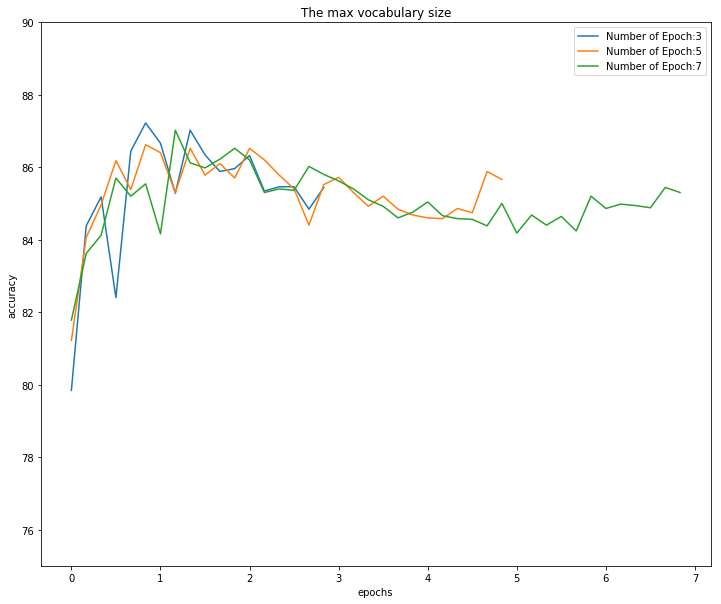

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax2=plt.subplots(figsize=(12,10))
lines=locals()


i = 0
for step in ['3','5','7']:
        y = num_result[i]
        label = "Number of Epoch:"+str(step)
        xpts = np.arange(0 , 2*i+3, 1/6)
        plt.plot(xpts, y, label=label)
        i += 1

ax2.legend(loc = 'best')
plt.title('The max vocabulary size')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(75,90)
plt.show()

In [35]:
def predictor(loader, model):
    model.eval()
    all_predicted = []
    all_label = []
    
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = [x.item() for x in outputs.max(1, keepdim=True)[1]]
        all_predicted += predicted
        all_label += [x.item() for x in labels]
    return (all_predicted, all_label)

In [67]:
all_pred, all_lab = predictor(val_loader, model)
wrong =[]
right= []
right_cnt = 0
wrong_cnt=0
for i in range(15000):
    if all_pred[i] != all_lab[i]:
        wrong_pred_recorder.append((all_test[i], all_lab[i]))
        wrong_cnt +=1
    else:
        right_pred_recorder.append((all_test[i], all_lab[i]))
        right_cnt +=1
    if (wrong_cnt==3 and right_cnt==3):
        break

for i in range(3):
    print(wrong[i])

Alan Rickman & Emma Thompson give good performances with southern/New Orleans accents in this detective flick. It's worth seeing for their scenes- and Rickman's scene with Hal Holbrook. These three actors mannage to entertain us no matter what the movie, it seems. The plot for the movie shows potential, but one gets the impression in watching the film that it was not pulled off as well as it could have been. The fact that it is cluttered by a rather uninteresting subplot and mostly uninteresting kidnappers really muddles things. The movie is worth a view- if for nothing more than entertaining performances by Rickman, Thompson, and Holbrook. 0
Aaran is one of the movies where you find the loop holes in Indian Cinema. Here is one good example to show how excellent writers, directors and actors succumb to the producers. Here is one of the most wonderful actors, Mohanlal, acting in a movie about a real story in Kashmir. The seriousness of the film is slaughtered with sub standard comic sce

In [69]:
for i in range(3):
    print(right[i])

I was forced to read this sappy "love story" between a German 24 year old POW and a 12 year old Jew. That has "political correctness" written all over it. Its kind of like the movie "SPIRIT" in which a horse wants to be free but those "evil" Americans wont let it because they need it. Well i have good news the Americans are "evil" in The German soldier and his summer book. Why!!! Horses where given to us by god and if the Americans needed a horse the can darn well use it. In the same sense the German had been trying to kill Americans, but this book/movie makes it seem OK! The casting is absolutely awful!!!!!!!!!!!! The girl is Hispanic the mother is white the dad it probubly from mostly white descent and the little sister is "shirley templish." The acting is pretty bad too, the serious parts become comedy! Concluson-Bad movie, bad book, but both have different endings, don't read or see either one! 0
This is almost Ed Wood territory. Yeah, that ridiculous wreck of a flying monster look